In [3]:
from matplotlib import rcdefaults
rcdefaults()  # restore default matplotlib rc parameters
%config InlineBackend.figure_format='retina'   
import seaborn as sns  # wrapper for matplotlib that provides prettier styles and more
import matplotlib.pyplot as plt  # use matplotlib functionality directly
%matplotlib inline   
sns.set()

In [4]:
import numpy as np

# Euler and Midpoint methods compared

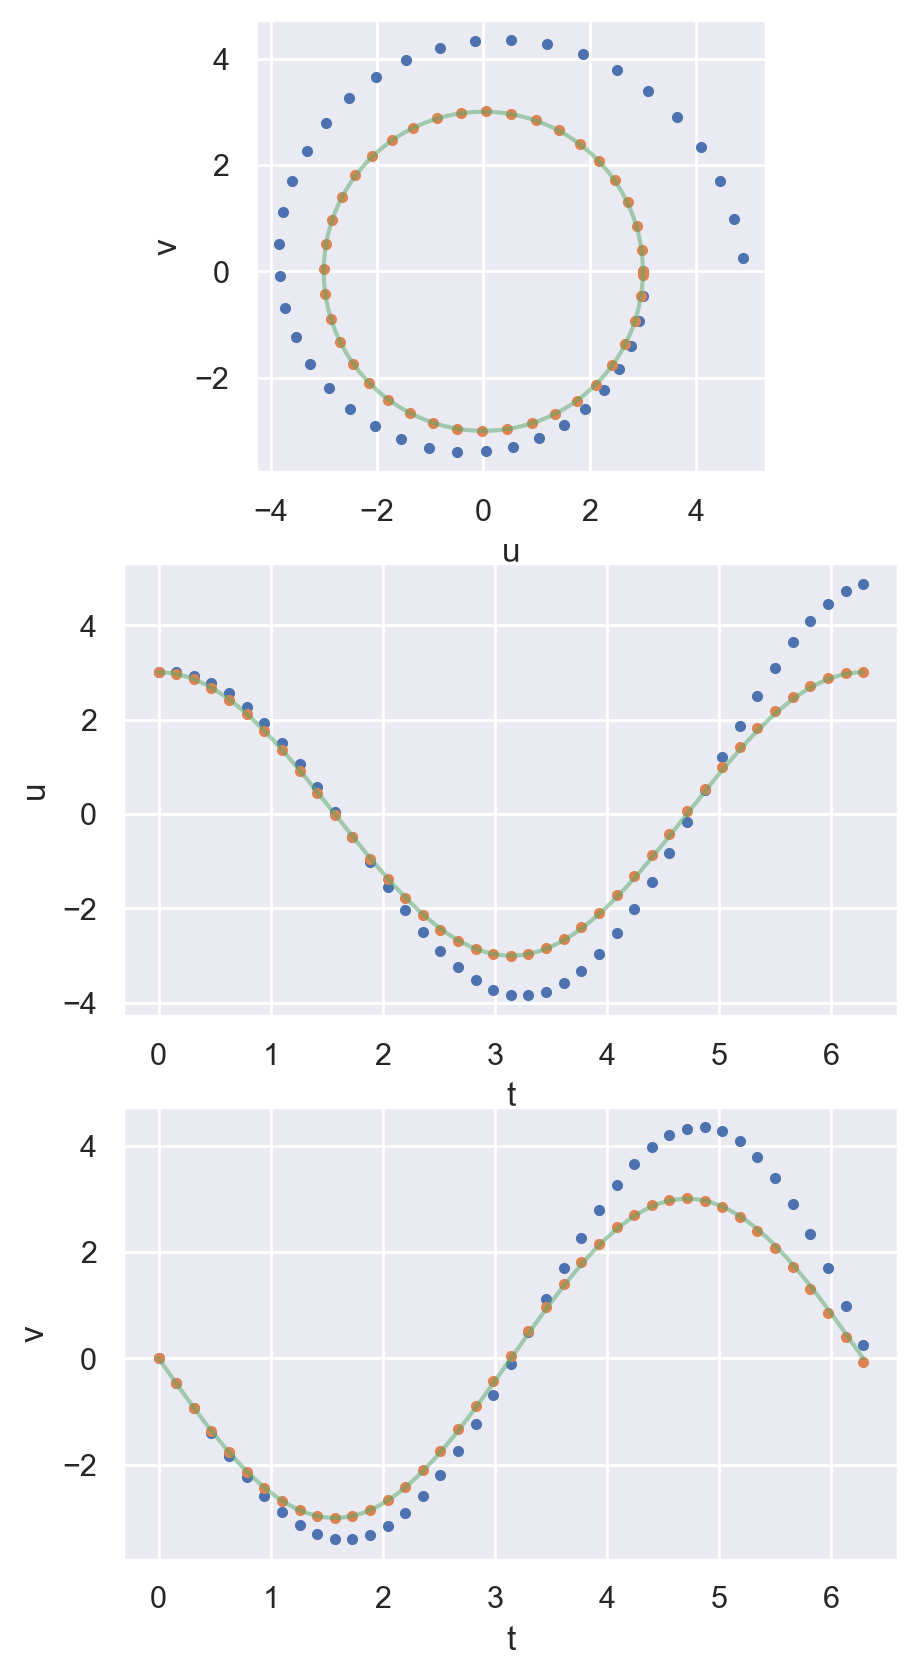

In [6]:
def f(t,y):
    u,v = y
    return np.array([v,-u])

def exact(t):
    return 3* np.array(  [np.cos(t),-np.sin(t)]  )

T = 2*np.pi  # final value of t

fig,axes = plt.subplots(3,1,figsize=(5,10))

def euler(m):
    t = 0
    y = np.array([3.,0.])

    h = (T-t)/m

    ta = np.empty(m+1)
    ta[0] = t

    ya = np.empty((2,m+1))  # a 2d array
    ya[:,0] = y
    for k in range(m): # 0, 1, 2, ...
        y = y + h*f(t,y)  # scalar mult and addition done element-wise
        t += h
        ta[k+1] = t
        ya[:,k+1] = y
    if doplot:
        axes[0].set_aspect(1)
        axes[0].plot(ya[0,:],ya[1,:],'.')
        axes[1].plot(ta,ya[0,:],'.')
        axes[2].plot(ta,ya[1,:],'.')
    return y

def midpoint(m):
    t = 0
    y = np.array([3.,0.])

    h = (T-t)/m

    ta = np.empty(m+1)
    ta[0] = t

    ya = np.empty((2,m+1))  # a 2d array
    ya[:,0] = y
    for k in range(m): # 0, 1, 2, ...
        ymid = y + h/2*f(t,y)  # scalar mult and addition done element-wise
        y = y + h*f(t+h/2,ymid)
        t += h
        ta[k+1] = t
        ya[:,k+1] = y

    if doplot:
        axes[0].set_aspect(1)
        axes[0].plot(ya[0,:],ya[1,:],'.')
        axes[1].plot(ta,ya[0,:],'.')
        axes[2].plot(ta,ya[1,:],'.')
    return y

doplot = True
for method in [euler,midpoint]:
    method(40)
t = np.linspace(0,2*np.pi,200)
y = exact(t)
axes[0].plot( y[0,:],y[1,:],alpha=0.5)
axes[1].plot( t,y[0,:],alpha=0.5)
axes[2].plot( t,y[1,:],alpha=0.5)
axes[0].set_xlabel('u'); axes[0].set_ylabel('v')
axes[1].set_xlabel('t'); axes[1].set_ylabel('u')
axes[2].set_xlabel('t'); axes[2].set_ylabel('v');


Midpoint (orange) is dramatically better than Euler (blue). Green is exact solution.